# Konecta Technical Test For Data Scientist Position: Part 1

## Churn Detection For Banks

### Presented by Guillermo Andrés Arboleda Garzón, gaarboledag@gmail.com, gaarboledag@ut.edu.co.

### Table of Contents:

1. [Setting the environment](#1.-Setting-the-environment)
2. [Data exploration & Cleaning](#2.-Data-exploration-&-Cleaning)
3. [Data Visualization](#3.-Data-Visualization)
4. [Feature engineering](#4.-Feature-engineering)
5. [Model training & evaluation](#5.-Model-training-&-evaluation)
6. [Inference](#6.-Inference)
7. [Future improvements, OOP and deployment discussion](#7.-Future-improvements,-OOP-and-deployment-discussion)

## 1. Setting the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load the datasets
train_df = pd.read_csv('train.csv')
inference_df = pd.read_csv('inference.csv')

## 2. Data exploration & Cleaning

In [2]:
print("Data basic information:")
print(train_df.info())

Data basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148531 entries, 0 to 148530
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               148531 non-null  int64  
 1   CustomerId       148531 non-null  int64  
 2   Surname          148531 non-null  object 
 3   CreditScore      148531 non-null  int64  
 4   Geography        148531 non-null  object 
 5   Gender           148531 non-null  object 
 6   Age              148531 non-null  float64
 7   Tenure           148531 non-null  int64  
 8   Balance          148531 non-null  float64
 9   NumOfProducts    148531 non-null  int64  
 10  HasCrCard        148531 non-null  float64
 11  IsActiveMember   148531 non-null  float64
 12  EstimatedSalary  148531 non-null  float64
 13  Churn            148531 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.9+ MB
None


**Feature Description:**

**id:** A unique identifier for each record.

**CustomerId:** A unique identifier for each customer.

**Surname:** The surname of the customer.

**CreditScore:** The credit score of the customer, indicating their creditworthiness.

**Geography:** The geographical location or country of the customer.

**Gender:** The gender of the customer.

**Age:** The age of the customer.

**Tenure:** The number of years the customer has been with the bank.

**Balance:** The account balance of the customer.

**NumOfProducts:** The number of bank products the customer is using.

**HasCrCard:** Indicates whether the customer has a credit card (1.0 for yes, 0.0 for no).

**IsActiveMember:** Indicates whether the customer is an active member (1.0 for yes, 0.0 for no).

**EstimatedSalary:** The estimated annual salary of the customer.

**Churn:** Indicates whether the customer has churned (1 for yes, 0 for no).

In [3]:
print("\n First 5 rows of data:")
train_df.head()


 First 5 rows of data:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,94224,15748608,Gordon,619,Germany,Female,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,148424,15651450,Chu,676,Germany,Female,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,10745,15588560,Scott,748,France,Female,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,30133,15683363,Goddard,641,France,Female,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,138709,15790594,Tien,688,Germany,Male,42.0,9,161588.89,2,0.0,1.0,54019.93,0


In [4]:
print("\n Summary statistics:")
print(train_df.describe())


 Summary statistics:
                  id    CustomerId    CreditScore            Age  \
count  148531.000000  1.485310e+05  148531.000000  148531.000000   
mean    82549.661848  1.569205e+07     656.469168      38.121300   
std     47622.558340  7.143646e+04      80.051965       8.872704   
min         0.000000  1.556570e+07     350.000000      18.000000   
25%     41346.500000  1.563319e+07     597.000000      32.000000   
50%     82502.000000  1.569016e+07     659.000000      37.000000   
75%    123787.500000  1.575690e+07     710.000000      42.000000   
max    165033.000000  1.581569e+07     850.000000      92.000000   

              Tenure        Balance  NumOfProducts     HasCrCard  \
count  148531.000000  148531.000000  148531.000000  148531.00000   
mean        5.022184   55436.712123       1.554692       0.75422   
std         2.803853   62785.290142       0.547990       0.43055   
min         0.000000       0.000000       1.000000       0.00000   
25%         3.000000     

In [5]:
print("\n Checking for missing values:")
print(train_df.isnull().sum())


 Checking for missing values:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64



 Checking the distribution of the target variable:


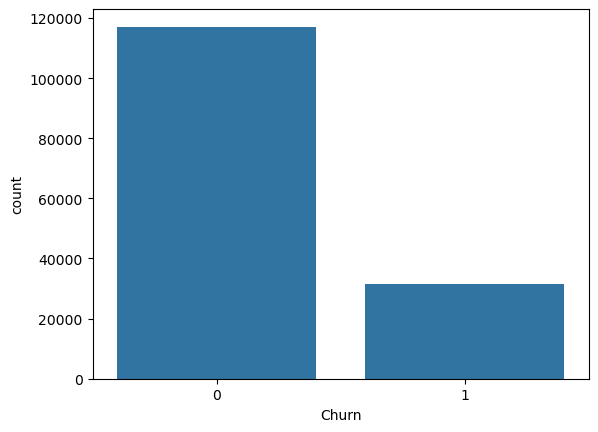

In [6]:
print("\n Checking the distribution of the target variable:")
sns.countplot(x='Churn', data=train_df)
plt.show()

The dataset contains 148,531 entries with 14 columns including customer demographic information, account balance, and activity details. There are no missing values. Key insights include:

    - The average customer age is 38 years.
    - Credit scores range between 350 and 850, with an average of 656.
    - The average account balance is approximately 55,437.
    - Around 75% of customers have a credit card.
    - About half of the customers are active members.
    - The target variable, Churn, indicates that roughly 21% of customers have churned.

#### Cleaning Process

In [7]:
# Deleting no relevant columns
train_df.drop(['id', 'CustomerId', 'Surname'],axis='columns',inplace=True)

# Setting the correct format for the features
train_df['Age'] = train_df['Age'].astype(int)
train_df['HasCrCard'] = train_df['HasCrCard'].astype(int)
train_df['IsActiveMember'] = train_df['IsActiveMember'].astype(int)

#### Looking for Correlation


 Checking the correlation matrix with only numeric columns:


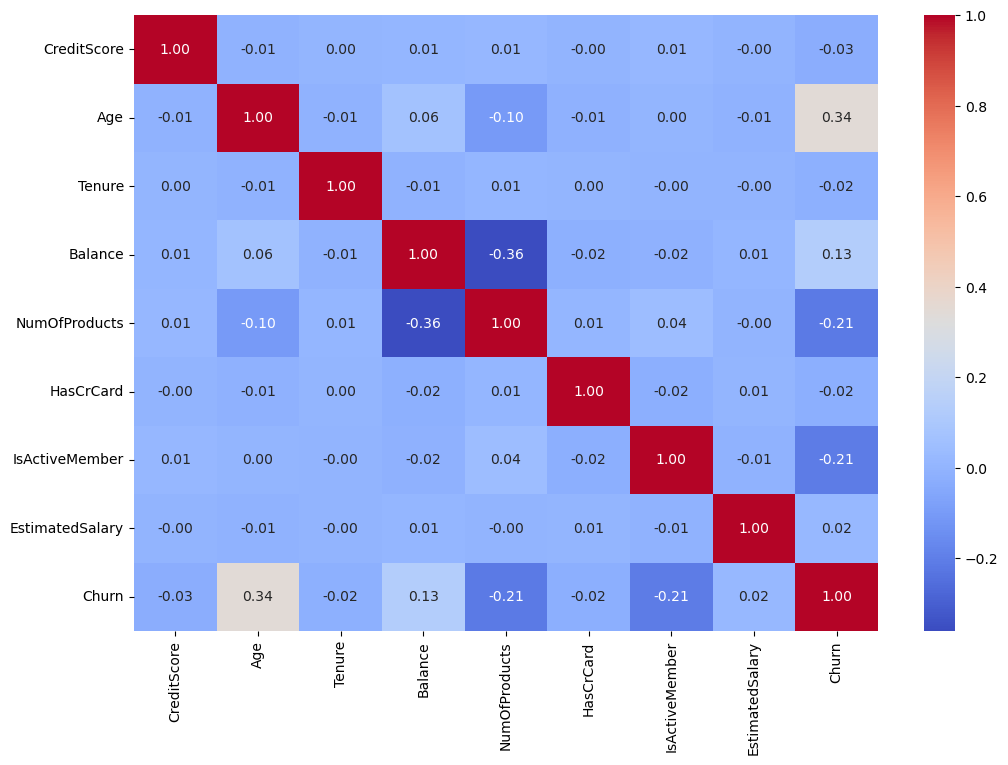

In [8]:
print("\n Checking the correlation matrix with only numeric columns:") 
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

The dataset has no missing values, and the correlation matrix was computed for numerical columns to understand relationships between variables. This information provides a overview of customer profiles and churn tendencies.

    - There are a partial positive correlation between the target column "Churn" and the columns "Age" and "Balance"
    - There are a negative correlation between the target column "Churn" and the columns "NumOfProducts" and "IsActiveMember"
    - There are a negative correlation between the columns "NumOfProducts" and "Balance"

## 3. Data Visualization 

The correlations found above allow us to create graphs that better illustrate the behavior of the variables. In this case, to learn more about the customer profile and the causes of churn.

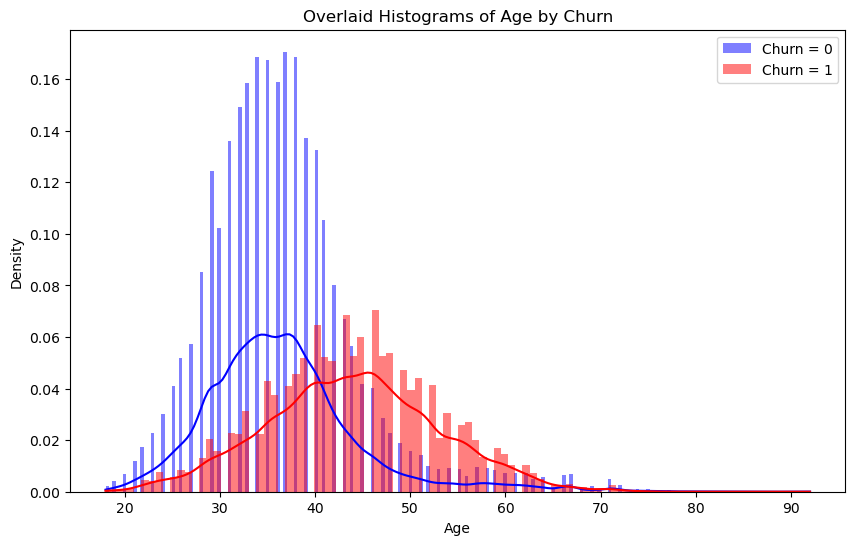

In [9]:
# Histogramas superpuestos
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['Churn'] == 0]['Age'], color='blue', label='Churn = 0', kde=True, stat="density", linewidth=0)
sns.histplot(train_df[train_df['Churn'] == 1]['Age'], color='red', label='Churn = 1', kde=True, stat="density", linewidth=0)
plt.title('Overlaid Histograms of Age by Churn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

The graph above shows:

    - The average age of customers who leave the bank (approx. 42) is greater than the average age of the customers staying in the bank (approx. 35)

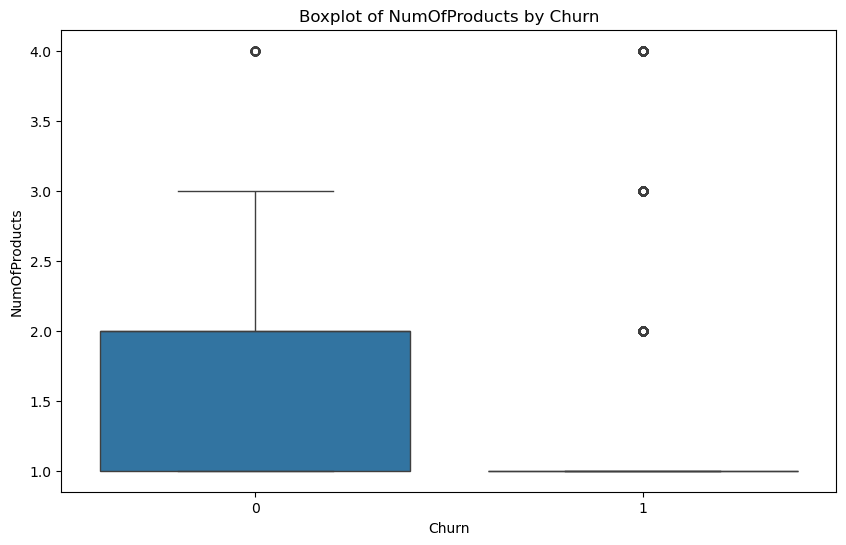

In [10]:
# Gráfico de cajas (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='NumOfProducts', data=train_df)
plt.title('Boxplot of NumOfProducts by Churn')
plt.xlabel('Churn')
plt.ylabel('NumOfProducts')
plt.show()

The last boxplot show us that the customers more likely to churn are the ones who have contrated only one product in the bank.

## 4. Feature engineering

In [11]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(train_df)

Geography: ['Germany' 'France' 'Spain']
Gender: ['Female' 'Male']


In [12]:
pd.set_option('future.no_silent_downcasting', True)

# Adjust data structure
train_df['Gender'] = train_df['Gender'].replace({'Female': 1, 'Male': 0})

# One hot encoding for categorical columns
train_df = pd.get_dummies(data=train_df, columns=['Geography'])

# Adjust column data types
train_df['Gender'] = train_df['Gender'].astype(int)
train_df['Geography_France'] = train_df['Geography_France'].astype(int)
train_df['Geography_Germany'] = train_df['Geography_Germany'].astype(int)
train_df['Geography_Spain'] = train_df['Geography_Spain'].astype(int)

# Regularizing 'CreditScore','Tenure','Balance' and 'EstimatedSalary'
cols_to_scale = ['CreditScore','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

# Standarizing 'Age'
scaler_age = StandardScaler()
train_df['Age'] = scaler_age.fit_transform(train_df[['Age']])

# Normalizing 'NumOfProducts'
scaler_products = MinMaxScaler()
train_df['NumOfProducts'] = scaler_products.fit_transform(train_df[['NumOfProducts']])



Let's review the structure of the features one last time. We can even check the interval of values in each one of the features to comprobate the correct data preprocessing:

In [13]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148531 entries, 0 to 148530
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        148531 non-null  float64
 1   Gender             148531 non-null  int64  
 2   Age                148531 non-null  float64
 3   Tenure             148531 non-null  float64
 4   Balance            148531 non-null  float64
 5   NumOfProducts      148531 non-null  float64
 6   HasCrCard          148531 non-null  int64  
 7   IsActiveMember     148531 non-null  int64  
 8   EstimatedSalary    148531 non-null  float64
 9   Churn              148531 non-null  int64  
 10  Geography_France   148531 non-null  int64  
 11  Geography_Germany  148531 non-null  int64  
 12  Geography_Spain    148531 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 14.7 MB


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,-0.689904,0.8,0.699113,0.000000,1,0,0.863987,1,0,1,0
1,0.652,1,0.211741,0.4,0.719497,0.333333,1,1,0.855250,0,0,1,0
2,0.796,1,0.099035,0.8,0.000000,0.000000,0,0,0.286585,1,1,0,0
3,0.582,1,0.099035,0.4,0.000000,0.000000,1,0,0.226510,1,1,0,0
4,0.676,0,0.437152,0.9,0.644042,0.333333,0,1,0.270068,0,0,1,0


In [14]:
for col in train_df:
    print(f'{col}: {train_df[col].unique()}')

CreditScore: [0.538 0.652 0.796 0.582 0.676 0.662 0.844 0.658 0.65  0.53  0.918 0.474
 0.938 0.33  0.616 0.672 0.666 0.518 0.812 0.69  0.496 0.588 0.374 0.762
 0.71  0.5   0.43  0.85  0.516 0.558 0.544 0.568 0.384 0.736 0.434 0.32
 0.694 0.808 0.638 0.648 0.478 0.534 0.72  0.37  0.998 0.438 0.714 0.502
 0.618 0.51  0.458 0.708 0.782 0.718 0.59  0.494 0.36  0.668 0.802 0.57
 0.748 0.852 0.462 0.596 0.612 0.572 0.386 0.624 0.444 0.464 0.758 1.
 0.814 0.556 0.678 0.39  0.576 0.604 0.424 0.578 0.696 0.698 0.466 0.706
 0.45  0.634 0.646 0.656 0.952 0.688 0.622 0.97  0.66  0.664 0.52  0.602
 0.732 0.488 0.394 0.724 0.67  0.674 0.754 0.436 0.884 0.382 0.636 0.492
 0.484 0.614 0.422 0.608 0.866 0.764 0.564 0.586 0.712 0.566 0.41  0.628
 0.486 0.412 0.574 0.788 0.224 0.7   0.816 0.238 0.778 0.804 0.552 0.318
 0.364 0.912 0.47  0.48  0.682 0.886 0.702 0.584 0.594 0.62  0.532 0.6
 0.536 0.408 0.728 0.548 0.798 0.246 0.498 0.542 0.772 0.402 0.42  0.926
 0.75  0.846 0.426 0.446 0.786 0.454 0.472 0.

## 5. Model training & evaluation

I will fit three different classification models to our data. The first is a traditional logistic regression that will serve as a strong starting point. Then I will move on to a more robust technique of deep learning in two neural networks with different configurations. Once the modeling is finished, I will evaluate each model in order to identify the one that obtains the best results.

### Model 1: Logistic Regression

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable from the DataFrame
X = train_df.drop('Churn', axis='columns')
y = train_df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with Logistic Regression and the defined hyperparameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8344161308782442
Confusion Matrix:
[[22366  1009]
 [ 3910  2422]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     23375
           1       0.71      0.38      0.50      6332

    accuracy                           0.83     29707
   macro avg       0.78      0.67      0.70     29707
weighted avg       0.82      0.83      0.81     29707



### Model 2

In [16]:
X = train_df.drop('Churn',axis='columns')
y = train_df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

len(X_train.columns)==12

True

In [17]:
# Model trainning
import tensorflow as tf
from tensorflow import keras


model2 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=100)

2024-07-30 10:19:11.041371: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 10:19:11.044765: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 10:19:11.079528: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 10:19:11.946059: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


/home/memo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 842us/step - accuracy: 0.8173 - loss: 0.4285
Epoch 2/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.8484 - loss: 0.3557
Epoch 3/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step - accuracy: 0.8595 - loss: 0.3308
Epoch 4/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 677us/step - accuracy: 0.8643 - loss: 0.3252
Epoch 5/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step - accuracy: 0.8627 - loss: 0.3276
Epoch 6/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 718us/step - accuracy: 0.8629 - loss: 0.3274
Epoch 7/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 711us/step - accuracy: 0.8648 - loss: 0.3246
Epoch 8/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 731us/step - accuracy: 0.8632 - loss: 0.3265
Epoch 9/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 5s 699us/step - accuracy: 0.8637 - loss: 0.3264
Epoch 10/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.8648 - loss: 0.3242
Epoch 11/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 2s 655us/step - accuracy: 0.8639 - loss: 0.3260
Epoch 12/

In [18]:
# Model Evaluating
model2.evaluate(X_test, y_test)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.8645 - loss: 0.3243


[0.32276979088783264, 0.865284264087677]

In [19]:
yp2 = model2.predict(X_test)
yp2[:5]

y_pred2 = []
for element in yp2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

print(classification_report(y_test,y_pred2))

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     23375
           1       0.79      0.50      0.61      6332

    accuracy                           0.87     29707
   macro avg       0.83      0.73      0.77     29707
weighted avg       0.86      0.87      0.85     29707



### Model 3

In [20]:
# Model trainning
import tensorflow as tf
from tensorflow import keras


model3 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=100)

Epoch 1/100


/home/memo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 807us/step - accuracy: 0.8171 - loss: 0.4189
Epoch 2/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 746us/step - accuracy: 0.8494 - loss: 0.3579
Epoch 3/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step - accuracy: 0.8560 - loss: 0.3376
Epoch 4/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 855us/step - accuracy: 0.8635 - loss: 0.3249
Epoch 5/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8629 - loss: 0.3277
Epoch 6/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 876us/step - accuracy: 0.8615 - loss: 0.3288
Epoch 7/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8637 - loss: 0.3260
Epoch 8/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8647 - loss: 0.3251
Epoch 9/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8640 - loss: 0.3247
Epoch 10/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step - accuracy: 0.8627 - loss: 0.3256
Epoch 11/100
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step - accuracy: 0.8636 - loss: 0.3258
Epoch 12/100
3714

In [21]:
# Model Evaluating
model3.evaluate(X_test, y_test)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.3229


[0.3211848735809326, 0.8672029972076416]

In [22]:
yp3 = model3.predict(X_test)
yp3[:5]

y_pred3 = []
for element in yp3:
    if element > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

print(classification_report(y_test,y_pred3))

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23375
           1       0.76      0.56      0.64      6332

    accuracy                           0.87     29707
   macro avg       0.82      0.75      0.78     29707
weighted avg       0.86      0.87      0.86     29707



After adjust and evaluate each of the classification models selected, we can conclude that the model 2 is the best fit for the situation. In the next section we will make the predictions for inference.csv data applying it. This model is considered good because it demonstrates high precision, recall, and F1-scores for the majority class, reasonable performance for the minority class, and overall high accuracy, all while handling an imbalanced dataset effectively.

### 6. Inference

First i need to ensure that the inference.csv features have the same structure and preprocessing made for the training features:

In [23]:
# Deleting no relevant columns
inference_df.drop(['id', 'CustomerId', 'Surname'],axis='columns',inplace=True)

# Setting the correct format for the features
inference_df['Age'] = inference_df['Age'].astype(int)
inference_df['HasCrCard'] = inference_df['HasCrCard'].astype(int)
inference_df['IsActiveMember'] = inference_df['IsActiveMember'].astype(int)

# Adjust data structure
inference_df['Gender'] = inference_df['Gender'].replace({'Female': 1, 'Male': 0})

# One hot encoding for categorical columns
inference_df = pd.get_dummies(data=inference_df, columns=['Geography'])

# Adjust column data types
inference_df['Gender'] = inference_df['Gender'].astype(int)
inference_df['Geography_France'] = inference_df['Geography_France'].astype(int)
inference_df['Geography_Germany'] = inference_df['Geography_Germany'].astype(int)
inference_df['Geography_Spain'] = inference_df['Geography_Spain'].astype(int)

# Regularizing 'CreditScore','Tenure','Balance' and 'EstimatedSalary'
cols_to_scale = ['CreditScore','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inference_df[cols_to_scale] = scaler.fit_transform(inference_df[cols_to_scale])

# Standarizing 'Age'
scaler_age = StandardScaler()
inference_df['Age'] = scaler_age.fit_transform(inference_df[['Age']])

# Normalizing 'NumOfProducts'
scaler_products = MinMaxScaler()
inference_df['NumOfProducts'] = scaler_products.fit_transform(inference_df[['NumOfProducts']])

In [24]:
# Make predictions
predictions = model2.predict(inference_df)

# Convert predictions to binary labels if necessary
# Assuming this is a binary classification problem
binary_predictions = (predictions > 0.5).astype(int)

# Optional: Add predictions to inference_df
inference_df['Churn'] = binary_predictions

# Save the predictions to a CSV file
inference_df.to_csv('inference.csv', index=False)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step


### 7. Future improvements, OOP and deployment discussion

Future improvements could include:
1. Using more sophisticated feature engineering techniques.
2. Testing additional models such as gradient boosting.
3. Performing more extensive hyperparameter tuning.
4. Using cross-validation to ensure model robustness.
5. Incorporating domain knowledge into feature selection and engineering.


Object-Oriented Programming (OOP) could be applied by creating classes for data preprocessing,
model training, and evaluation. This would make the code more modular and reusable.

For deployment, the model can be serialized using libraries such as joblib or pickle. The model
can be deployed as a REST API using Flask or Django, and served using a platform like Docker or
Kubernetes to ensure scalability and reliability.

Thank you,

Presented by Guillermo Andrés Arboleda Garzón for Konecta Data Scientist Position at 30/07/2024